In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [5]:
def load_dataset(data_dir, target_size=(128, 128)):
    images = []
    labels = []
    class_names = os.listdir(data_dir)
    for class_idx, class_name in enumerate(class_names):
        class_dir = os.path.join(data_dir, class_name)
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            img = load_img(img_path, target_size=target_size)
            img_array = img_to_array(img) / 255.0
            images.append(img_array)
            labels.append(class_idx)
    return np.array(images), np.array(labels), class_names

In [6]:

def visualize_images(images, labels, class_names):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        idx = np.random.randint(0, len(images))
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[idx])
        plt.title(class_names[labels[idx]])
        plt.axis('off')
    plt.show()

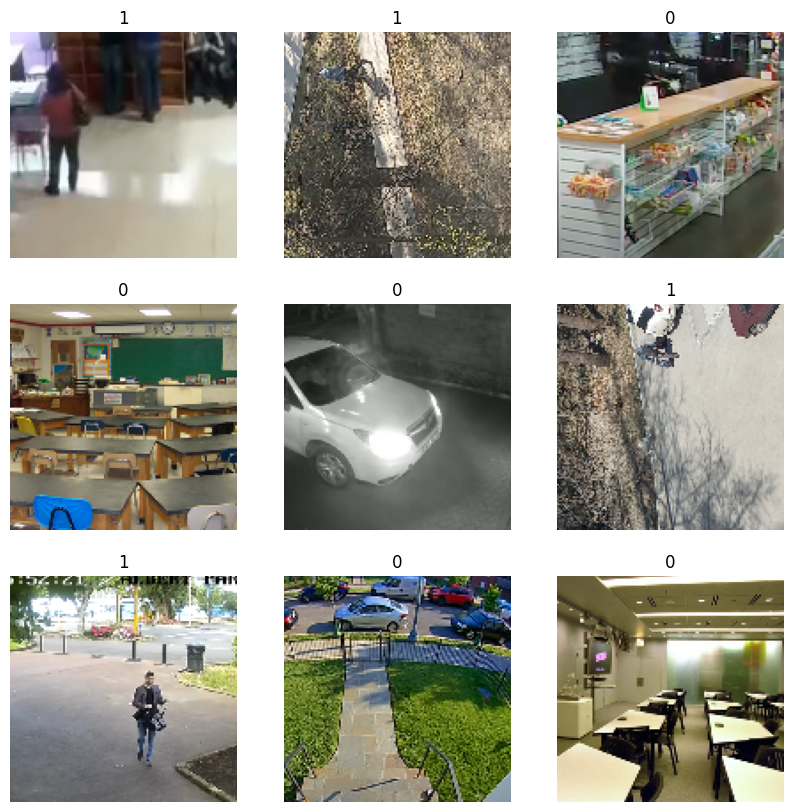

In [8]:
data_dir = 'human detection dataset' 
images, labels, class_names = load_dataset(data_dir)
visualize_images(images, labels, class_names)

In [9]:

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [10]:

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
y_train = to_categorical(y_train, len(class_names))
y_test = to_categorical(y_test, len(class_names))

In [11]:

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(class_names), activation='softmax')
])

C:\Users\Kamalesh velusamy\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=10, validation_data=(X_test, y_test))

Epoch 1/10


C:\Users\Kamalesh velusamy\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


23/23 ━━━━━━━━━━━━━━━━━━━━ 15s 527ms/step - accuracy: 0.6052 - loss: 1.2112 - val_accuracy: 0.5676 - val_loss: 0.6693
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 12s 492ms/step - accuracy: 0.6121 - loss: 0.6664 - val_accuracy: 0.6270 - val_loss: 0.6414
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 12s 482ms/step - accuracy: 0.6442 - loss: 0.6486 - val_accuracy: 0.6973 - val_loss: 0.5998
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 12s 481ms/step - accuracy: 0.6604 - loss: 0.6253 - val_accuracy: 0.6865 - val_loss: 0.5874
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 12s 485ms/step - accuracy: 0.6656 - loss: 0.6318 - val_accuracy: 0.6216 - val_loss: 0.6213
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 12s 488ms/step - accuracy: 0.6637 - loss: 0.6307 - val_accuracy: 0.7027 - val_loss: 0.5718
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 12s 480ms/step - accuracy: 0.6882 - loss: 0.6130 - val_accuracy: 0.6649 - val_loss: 0.5661
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 12s 477ms/step - accuracy: 0.6693 - loss: 0.6006 - val_accuracy: 0.691

In [13]:

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - accuracy: 0.7114 - loss: 0.5186
Test Loss: 0.5155
Test Accuracy: 0.7135


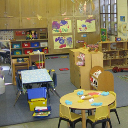

In [15]:
image = load_img(r'human detection dataset\0\2.png', target_size=(128,128))
image

In [16]:
img_arr = img_to_array(image)/255.0
img_arr.shape

(128, 128, 3)

In [18]:
img_arr = np.expand_dims(img_arr, axis=0)
img_arr.shape

(1, 128, 128, 3)

In [19]:
class_pred = model.predict(img_arr)
class_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


array([[0.64834386, 0.35165614]], dtype=float32)

In [20]:
pred_class = np.argmax(class_pred)
pred_class

0

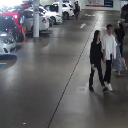

In [23]:
image_h = load_img(r'human detection dataset\1\4.png',target_size=(128,128))
image_h

In [24]:
img_arr_h = img_to_array(image_h)/255.0
img_arr_h = np.expand_dims(img_arr_h, axis=0)
img_arr_h.shape

(1, 128, 128, 3)

In [25]:
class_pred_h = model.predict(img_arr_h)
class_pred_h

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


array([[0.18136229, 0.8186377 ]], dtype=float32)

In [26]:
pred_class_h = np.argmax(class_pred_h)
pred_class_h

1